In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stat= pd.read_csv("stationary.csv", header=None)
grad= pd.read_csv("gradiente.csv", header=None)

vstat=np.array(stat)
vgrad=np.array(grad)

## Matriz de porcentajes de similitud

In [11]:
#normas de cada columna y asegurarnos de su tamaño
Norm_stat=np.linalg.norm(vstat, axis=0)
Norm_grad=np.linalg.norm(vgrad, axis=0)
Norm_stat=np.full((len(Norm_grad)),Norm_stat[0])

In [12]:
print(Norm_stat.shape)
print(Norm_grad.shape)

(801,)
(801,)


#### Este pequeño cálculo nos da todas las respuestas \
Es el cálculo más sencillo del error a partir de las diferencias absolutas entre los valores de la norma del estado estacionario y las normas de cada gradiente

In [22]:
perce=(abs(Norm_grad-Norm_stat)/Norm_stat)*100
print(perce.shape)

(801,)


In [58]:
#un t para poder graficar y hacer una recta en el 5%
t=np.linspace(0,800,801)
cinco=np.full((801),5)
print(cinco.shape)

(801,)


Calculamos ahora el número más cercano a un valor de 5 (qué es 5% de error) y su posición

In [48]:
# Calcular las diferencias absolutas entre cada elemento y 5
diferencias = np.abs(perce - 5)

# Encontrar el índice del elemento con la menor diferencia
indice_del_mas_cercano_a_5 = np.argmin(diferencias)

# Encontrar el número más cercano a 5
numero_mas_cercano_a_5 = perce[indice_del_mas_cercano_a_5]
posicion_cercano=np.argmin(diferencias)

print("Número más cercano a 5:", numero_mas_cercano_a_5)
print("Posición del número más cercano a 5:", posicion_cercano)

Número más cercano a 5: 5.018258351817176
Posición del número más cercano a 5: 202


### Graficamos lo obtenido

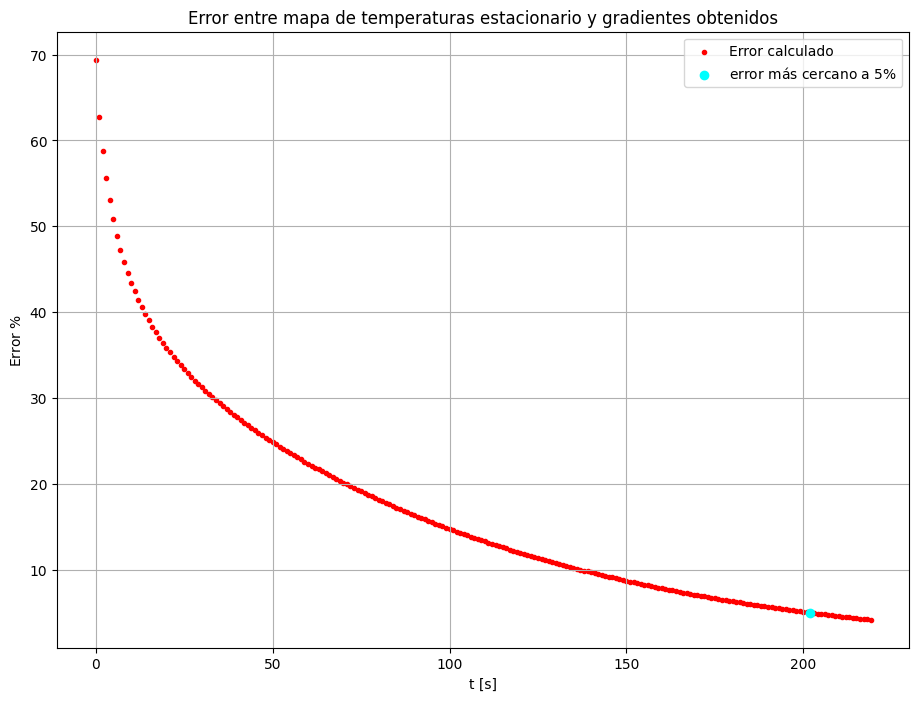

In [63]:
plt.figure(figsize=(11,8))
to=202
too=220
#plt.scatter(t,perce, color = 'orange', marker = '.',label='Completo')
plt.scatter(t[0:too],perce[0:too], color = 'red', marker = '.',label=r'Error calculado')
plt.scatter(t[202],perce[202], color = 'cyan', marker = 'o',label=r'error más cercano a $5\%$')

#plt.plot(t[0:to],cinco[0:to], color = 'blue', label=r'5 $\%$ diferencia')
#plt.plot(y_fijo['X (cm)'],y_fijo['Y = 0 cm'], color = 'orange',)

plt.title(r'Error entre mapa de temperaturas estacionario y gradientes obtenidos')
plt.legend()
plt.ylabel(r'Error $\%$')
plt.xlabel('t [s]')
plt.grid()